In [62]:
# Load libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 50
%precision 3

plt.rcParams['figure.figsize']=(16,4)

### Data exploration

In [2]:
# Load data
df = pd.read_csv('./data/diabetes-training.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6.0,25.0,1.0,1.0,?,Pediatrics-Endocrinology,41.0,0.0,1.0,0.0,0.0,0.0,250.83,?,?,1.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),?,1.0,1.0,7.0,3.0,?,?,59.0,0.0,18.0,0.0,0.0,0.0,276,250.01,255,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),?,1.0,1.0,7.0,2.0,?,?,11.0,5.0,13.0,2.0,0.0,1.0,648,250,V27,6.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1.0,1.0,7.0,2.0,?,?,44.0,1.0,16.0,0.0,0.0,0.0,8,250.43,403,7.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),?,1.0,1.0,7.0,1.0,?,?,51.0,0.0,8.0,0.0,0.0,0.0,197,157,250,5.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.007020e+05,1.007020e+05,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000
mean,1.630979e+08,5.400855e+07,2.027279,3.721654,5.756658,4.399674,43.109968,1.339894,16.015581,0.368493,0.197355,0.634784,7.415920
std,1.006163e+08,3.850109e+07,1.447526,5.288901,4.072007,2.987756,19.664934,1.704970,8.132274,1.268018,0.932471,1.260627,1.934534
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.446004e+07,2.339133e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.515187e+08,4.514234e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.272950e+08,8.728191e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [4]:
# baseline model
df['readmitted'].value_counts()

NO     54212
>30    35247
<30    11243
Name: readmitted, dtype: int64

In [5]:
df['max_glu_serum'].value_counts()

None    95374
Norm     2592
>200     1479
>300     1257
Name: max_glu_serum, dtype: int64

In [6]:
df['A1Cresult'].value_counts()

None    83866
>8       8121
Norm     4950
>7       3765
Name: A1Cresult, dtype: int64

In [7]:
df['age'].value_counts()

[70-80)     25811
[60-70)     22257
[50-60)     17084
[80-90)     16977
[40-50)      9597
[30-40)      3734
[90-100)     2757
[20-30)      1640
[10-20)       685
[0-10)        160
Name: age, dtype: int64

In [8]:
columns_to_drop = ['encounter_id', 'patient_nbr']
columns_to_drop_because_of_missing_data = ['weight', 'payer_code', 'max_glu_serum']

In [9]:
columns_to_drop_to_create_simple_model=['diag_1', 'diag_2', 'diag_3', 'medical_specialty']

In [10]:
columns_to_drop_to_eliminate_autocorrelation=['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

In [11]:
# drop columns
df = pd.read_csv('./data/diabetes-training.csv')
df = df.drop(columns_to_drop, axis=1)
df = df.drop(columns_to_drop_because_of_missing_data, axis=1)
df = df.drop(columns_to_drop_to_create_simple_model, axis=1)
df = df.drop(columns_to_drop_to_eliminate_autocorrelation, axis=1)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,A1Cresult,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0,None,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0,None,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0,None,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,None,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,None,Ch,Yes,NO


In [12]:
# # replace unknown values
# columns_to_replace_unknown_values = ['medical_specialty']
# df['medical_specialty'] = df['medical_specialty'].replace({'?': 'UNKNOWN'})
# df['medical_specialty'].value_counts()

In [13]:
# one-hot encode data
columns_to_one_hot_encode = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'A1Cresult', 'change', 'diabetesMed', 'readmitted']
df = pd.get_dummies(df, columns = columns_to_one_hot_encode)
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),...,admission_source_id_3.0,admission_source_id_4.0,admission_source_id_5.0,admission_source_id_6.0,admission_source_id_7.0,admission_source_id_8.0,admission_source_id_9.0,admission_source_id_10.0,admission_source_id_11.0,admission_source_id_14.0,admission_source_id_17.0,admission_source_id_20.0,admission_source_id_22.0,admission_source_id_25.0,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1
1,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
3,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1
4,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1


In [14]:
# no. of features
len(df.columns) - 3

85

In [15]:
# check for missing data again
df[df.isnull().any(axis=1)]

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),...,admission_source_id_3.0,admission_source_id_4.0,admission_source_id_5.0,admission_source_id_6.0,admission_source_id_7.0,admission_source_id_8.0,admission_source_id_9.0,admission_source_id_10.0,admission_source_id_11.0,admission_source_id_14.0,admission_source_id_17.0,admission_source_id_20.0,admission_source_id_22.0,admission_source_id_25.0,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
100679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df = df.dropna(how='any');

In [17]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),...,admission_source_id_3.0,admission_source_id_4.0,admission_source_id_5.0,admission_source_id_6.0,admission_source_id_7.0,admission_source_id_8.0,admission_source_id_9.0,admission_source_id_10.0,admission_source_id_11.0,admission_source_id_14.0,admission_source_id_17.0,admission_source_id_20.0,admission_source_id_22.0,admission_source_id_25.0,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
count,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,...,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000,100702.000000
mean,4.399674,43.109968,1.339894,16.015581,0.368493,0.197355,0.634784,7.415920,0.022184,0.189400,0.006197,0.747781,0.019890,0.014548,0.537636,0.462334,0.000030,0.001589,0.006802,0.016286,0.037080,0.095301,0.169649,0.221018,0.256311,...,0.001857,0.031469,0.008371,0.022303,0.563991,0.000159,0.001221,0.000079,0.000020,0.000020,0.067089,0.001589,0.000119,0.000020,0.037388,0.080644,0.832814,0.049155,0.461689,0.538311,0.230224,0.769776,0.111646,0.350013,0.538341
std,2.987756,19.664934,1.704970,8.132274,1.268018,0.932471,1.260627,1.934534,0.147283,0.391828,0.078474,0.434289,0.139624,0.119735,0.498584,0.498582,0.005458,0.039829,0.082195,0.126573,0.188958,0.293632,0.375326,0.414935,0.436598,...,0.043053,0.174583,0.091111,0.147669,0.495891,0.012604,0.034928,0.008913,0.004456,0.004456,0.250177,0.039829,0.010916,0.004456,0.189710,0.272289,0.373144,0.216192,0.498533,0.498533,0.420978,0.420978,0.314932,0.476976,0.498530
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.

In [51]:
# Convert to matrices for scikit-learn
target_variables = ['readmitted_<30', 'readmitted_>30', 'readmitted_NO', 'readmitted_YES']


def get_readmitted_cases(df):
    if df['readmitted_NO'] == 1:
        return 0
    elif df['readmitted_NO'] == 0:
        return 1

df['readmitted_YES'] = df.apply(get_readmitted_cases, axis=1)

X = df.drop(target_variables, axis=1).values
y = df.iloc[:, df.columns == 'readmitted_YES'].values.ravel()

In [52]:
X.shape

(100702, 85)

### Split dataset into train and test set

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Train model

In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Evaluate model

In [55]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("training set score: %f" % train_score)
print("test set score:     %f" % test_score)

training set score: 0.981026
test set score:     0.599698


In [56]:
from sklearn import metrics

In [57]:
expected = y_test
predicted = model.predict(X_test)

In [58]:
report = metrics.classification_report(expected, predicted)

print("CLASSIFICATION REPORT")
print(report)

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.61      0.72      0.66     13531
          1       0.59      0.46      0.51     11645

avg / total       0.60      0.60      0.59     25176



In [59]:
y_variable_names=['readmitted_<30', 'readmitted_>30', 'readmitted_NO', 'readmitted_YES']
X_variable_names=df.drop(y_variable_names, axis=1).columns
assert len(X_variable_names) == len(model.feature_importances_)

In [60]:
def plot_feature_importances(model, feature_names):
    feature_importances = model.feature_importances_
    
    sorted_feature_importances = sorted(zip(feature_importances, feature_names), reverse=True)
    
    plt.plot([x[0] for x in sorted_feature_importances], 'o')
    plt.xticks(range(len(df.columns)), [x[1] for x in sorted_feature_importances], rotation=90);

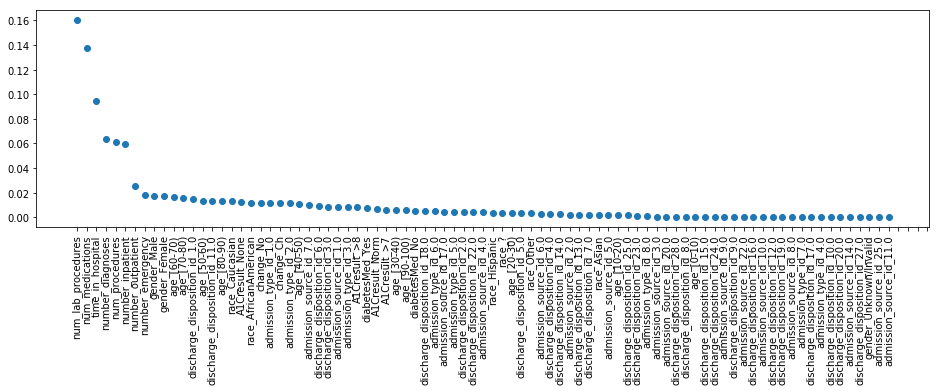

In [63]:
plot_feature_importances(model, X_variable_names)

In [ ]:
# Findings: A vanilla random forest can predict readmission with 46% recall rate and 59% precision rate.